step --------- maps a unit of time in the real world. In this case 1 step is 1 hour of time. Total steps 744 (30 days simulation).

type --------- CASH-IN, CASH-OUT, DEBIT, PAYMENT and TRANSFER.

amount --------amount of the transaction in local currency.

nameOrig --------- customer who started the transaction

oldbalanceOrg ---------initial balance before the transaction

newbalanceOrig -----------  new balance after the transaction

nameDest ----------------         customer who is the recipient of the transaction

oldbalanceDest -   ------------initial balance recipient before the transaction. Note that there is not information for customers that start with M (Merchants).

newbalanceDest ------------  new balance recipient after the transaction. Note that there is not information for customers that start with M (Merchants).

isFraud -  ------------        This is the transactions made by the fraudulent agents inside the simulation. In this specific dataset the fraudulent behavior of the agents aims to profit by taking control or customers accounts and try to empty the funds by transferring to another account and then cashing out of the system.

isFlaggedFraud ------------  The business model aims to control massive transfers from one account to another and flags illegal attempts. An illegal attempt in this dataset is an attempt to transfer more than 200.000 in a single transaction.

In [3]:
import pandas as pd

In [4]:
df=pd.read_csv("/content/Fraud.csv")

In [5]:
# overview of data
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [72]:
# firstly take a copy of dataset
df = df.copy()

In [6]:
# Count total duplicates
duplicates = df.duplicated().sum()
print(duplicates)
# data have no duplicates rows

0


In [7]:
# check missimg value
df.isnull().sum()# we got their is no missing values

,0
step,0
type,0
amount,0
nameOrig,0
oldbalanceOrg,0
newbalanceOrig,0
nameDest,0
oldbalanceDest,0
newbalanceDest,0
isFraud,0


In [8]:
# check the data types of all columns
print(df.dtypes)

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object


# data preprocessing

In [9]:
# we have to drop 2 column from the data set "nameDest" and "nameOrig" because they are not very much importtant for our model
df=df.drop(["nameDest","nameOrig"] , axis=1)


In [10]:
print(df.shape)

(6362620, 9)


In [11]:
# now i apply label encode on type column to change its data type and represent it into into which help in my rediction
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df["type"] = le.fit_transform(df["type"])


In [65]:
# to know which munber assing to what ?
for i, category in enumerate(le.classes_):
    print(f"encoded value {i} --> Category '{category}'")

Encoded value 0 --> Category 'CASH_IN'
Encoded value 1 --> Category 'CASH_OUT'
Encoded value 2 --> Category 'DEBIT'
Encoded value 3 --> Category 'PAYMENT'
Encoded value 4 --> Category 'TRANSFER'


In [12]:
print(df.dtypes)

step                int64
type                int64
amount            float64
oldbalanceOrg     float64
newbalanceOrig    float64
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object


In [13]:
# now all my data are in number so i can check multicollinearity
# checking multicollinearity
corr = df.corr()
corr

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
step,1.000000,0.006635,0.022373,-0.010058,-0.010299,0.027665,0.025888,0.031578,0.003277
type,0.006635,1.000000,0.088419,-0.339760,-0.352758,-0.104679,-0.059364,0.020833,0.002685
amount,0.022373,0.088419,1.000000,-0.002762,-0.007861,0.294137,0.459304,0.076688,0.012295
oldbalanceOrg,-0.010058,-0.339760,-0.002762,1.000000,0.998803,0.066243,0.042029,0.010154,0.003835
newbalanceOrig,-0.010299,-0.352758,-0.007861,0.998803,1.000000,0.067812,0.041837,-0.008148,0.003776
oldbalanceDest,0.027665,-0.104679,0.294137,0.066243,0.067812,1.000000,0.976569,-0.005885,-0.000513
newbalanceDest,0.025888,-0.059364,0.459304,0.042029,0.041837,0.976569,1.000000,0.000535,-0.000529
isFraud,0.031578,0.020833,0.076688,0.010154,-0.008148,-0.005885,0.000535,1.000000,0.044109
isFlaggedFraud,0.003277,0.002685,0.012295,0.003835,0.003776,-0.000513,-0.000529,0.044109,1.000000


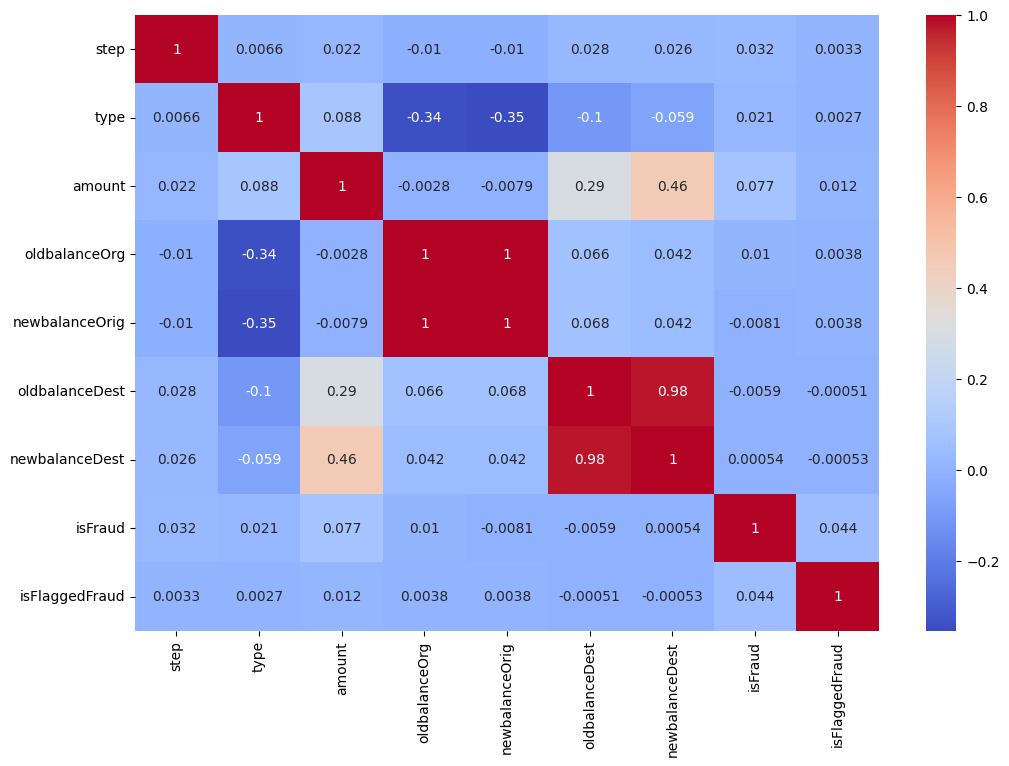

In [14]:
# for ease i use seaborn to visualize it
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

we see that 'oldbalanceDest' and 'newbalanceDest' are highly positive corelated
and  'oldbalanceOrg" and "newbalanceOrg' are also highly positive corelated

In [15]:
# instead of taking corelated column i only store its information in form of their difference and adding new column
#if also reduce dimensions of data which makes easy to train our model

df['diff_orig'] = df['oldbalanceOrg'] - df['newbalanceOrig']# changes of money in person account
df['diff_oest'] = df['newbalanceDest'] - df['oldbalanceDest']# changes of money in merchant account
df.drop(['oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest'], axis=1, inplace=True)


In [16]:
df.shape

(6362620, 7)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 7 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            int64  
 2   amount          float64
 3   isFraud         int64  
 4   isFlaggedFraud  int64  
 5   diff_orig       float64
 6   diff_oest       float64
dtypes: float64(3), int64(4)
memory usage: 339.8 MB


In [18]:
#check the count of fraud
# it is our target column
fraud_count = df['isFraud'].value_counts()
print(fraud_count)

isFraud
0    6354407
1       8213
Name: count, dtype: int64


In [68]:
# "isfraud" is our target column so i split my data set
X = df.drop('isFraud', axis=1)
Y = df['isFraud']


In [69]:
print(X)

         step  type      amount  isFlaggedFraud   diff_orig   diff_oest  \
0           1     3     9839.64               0     9839.64        0.00   
1           1     3     1864.28               0     1864.28        0.00   
2           1     4      181.00               0      181.00        0.00   
3           1     1      181.00               0      181.00   -21182.00   
4           1     3    11668.14               0    11668.14        0.00   
...       ...   ...         ...             ...         ...         ...   
6362615   743     1   339682.13               0   339682.13   339682.13   
6362616   743     4  6311409.28               0  6311409.28        0.00   
6362617   743     1  6311409.28               0  6311409.28  6311409.27   
6362618   743     4   850002.52               0   850002.52        0.00   
6362619   743     1   850002.52               0   850002.52   850002.52   

         amount_outlier  diff_orig_outlier  diff_oest_outlier  outlier  \
0                 False  

In [70]:
#isFlaggedFraud  -- this column is also show whether transaction if fraud or not so ,, it can cause to leak our data , so i remove it from X
X.drop('isFlaggedFraud', axis=1, inplace=True)

In [71]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 12 columns):
 #   Column             Dtype  
---  ------             -----  
 0   step               int64  
 1   type               int64  
 2   amount             float64
 3   diff_orig          float64
 4   diff_oest          float64
 5   amount_outlier     bool   
 6   diff_orig_outlier  bool   
 7   diff_oest_outlier  bool   
 8   outlier            int64  
 9   amount_out         bool   
 10  diff_orig_out      bool   
 11  diff_oest_out      bool   
dtypes: bool(6), float64(3), int64(3)
memory usage: 327.7 MB


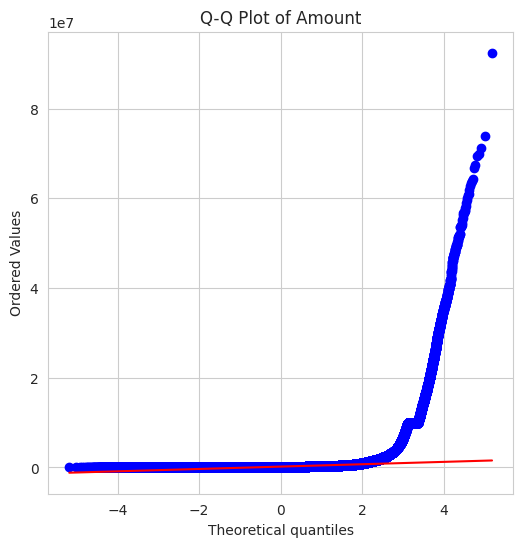

Skewness: 30.99394948249038
Kurtosis: 1797.9567053084595


In [46]:
#check the normality of data for apply the best suited outlier mothod on it
# for that is use kde plot and QQ plot
import scipy.stats as stats

plt.figure(figsize=(6,6))
stats.probplot(X['amount'], dist="norm", plot=plt)
plt.title("Q-Q Plot of Amount")
plt.show()

print("Skewness:", X['amount'].skew())
print("Kurtosis:", X['amount'].kurtosis())


my skweness and kurtosis for amount column is very large which shos that my data is not normal and it have large outliers

Skewness: 30.99394948249038

Kurtosis: 1797.9567053084595


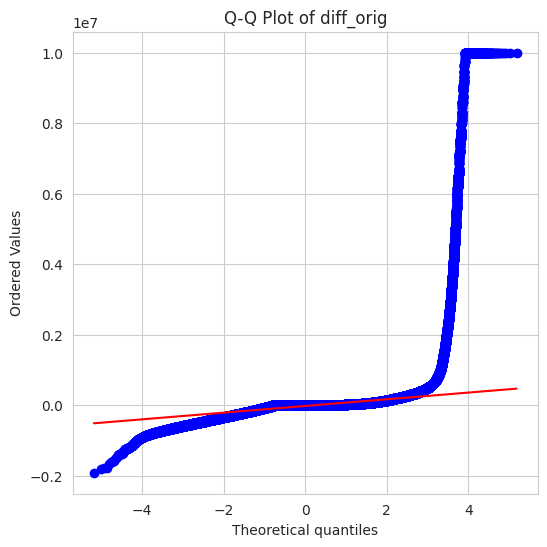

Skewness: 24.630520480392992
Kurtosis: 1509.9813319854009


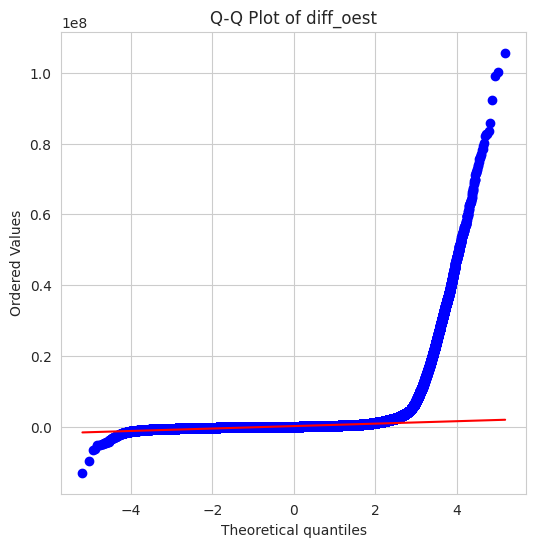

Skewness: 32.916340674728005
Kurtosis: 1765.310944297207


In [47]:
# similarly for  all nureric column
# for diff_orig
plt.figure(figsize=(6,6))
stats.probplot(X['diff_orig'], dist="norm", plot=plt)
plt.title("Q-Q Plot of diff_orig")
plt.show()

print("Skewness:", X['diff_orig'].skew())
print("Kurtosis:", X['diff_orig'].kurtosis())

# for diff_oest
plt.figure(figsize=(6,6))
stats.probplot(X['diff_oest'], dist="norm", plot=plt)
plt.title("Q-Q Plot of diff_oest")
plt.show()

print("Skewness:", X['diff_oest'].skew())
print("Kurtosis:", X['diff_oest'].kurtosis())

it also shows high right skewness and krutosis is also high  

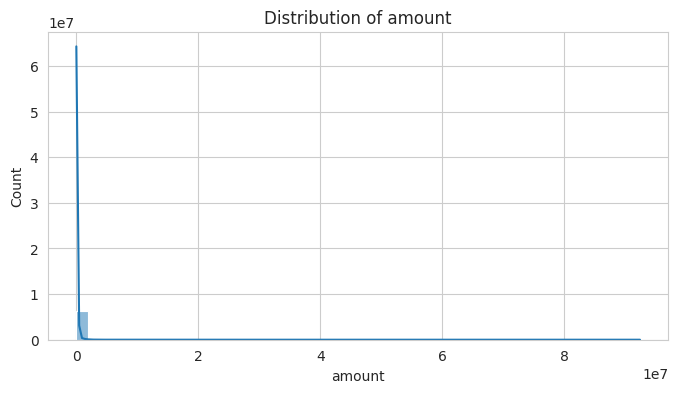

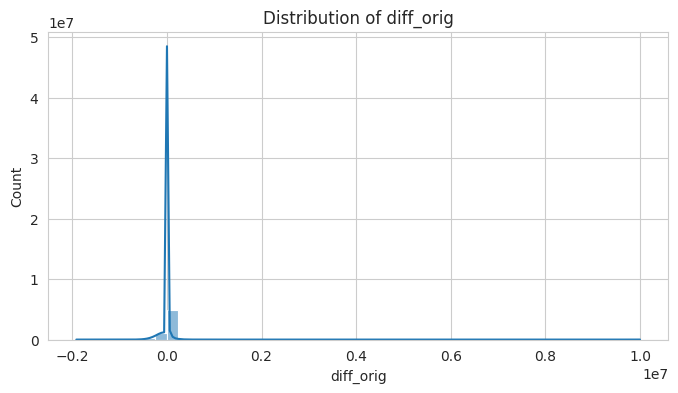

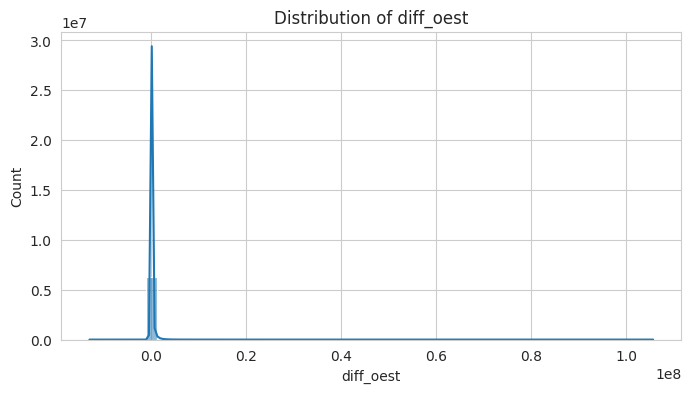

In [48]:
# now check the distribution of data
#  distribution of numeric column s
num_col = ['amount', 'diff_orig', 'diff_oest']


for col in num_col:
    plt.figure(figsize=(8,4))
    sns.histplot(X[col], bins=50, kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()

from here we see that 'diff_oest'and "diff_orig' have negative values

Text(0.5, 1.0, 'Scatter Plot of Step vs Amount')

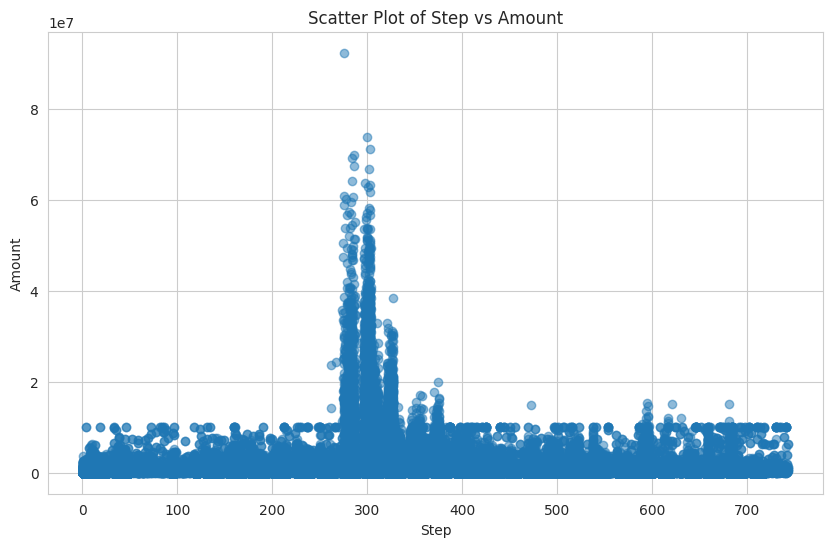

In [49]:
# distribution of step column ie. scatter grapgh
# now want to check at which time the fraude is occurs more w.r.t amount column

plt.figure(figsize=(10, 6))
plt.scatter(X['step'], X['amount'], alpha=0.5)
plt.xlabel('Step')
plt.ylabel('Amount')
plt.title('Scatter Plot of Step vs Amount')



 step vs amount graph shows

 at time 300 - 400 step their is large transaction fraud happen



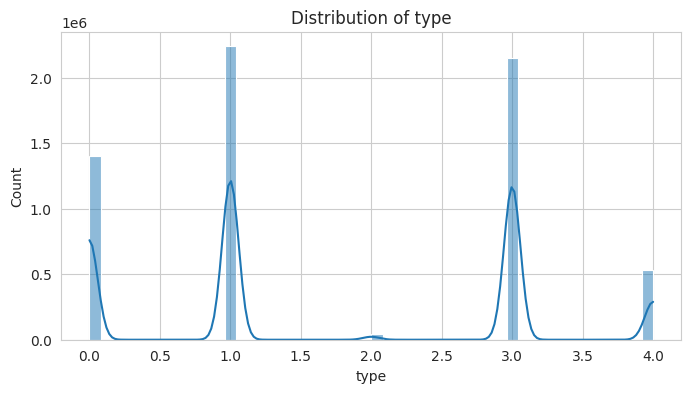

In [61]:
# plot hist plot for type column
plt.figure(figsize=(8,4))
sns.histplot(X['type'], bins=50, kde=True)
plt.title(f"Distribution of type")
plt.show()

it shows that our data is highly imbalance

In [58]:
# i have 5 dimension data  so i use IQR mothod for outlier detection  of numerical column

def iqr_outlier(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outlier = (X[column] < lower_bound) | (X[column] > upper_bound)
    return outlier

# now i apply it on each column
df['amount_out'] = iqr_outlier(X, 'amount')
df['diff_orig_out'] = iqr_outlier(X, 'diff_orig')
df['diff_oest_out'] = iqr_outlier(X, 'diff_oest')

In [59]:
# now count the outliers of each numeric column
print("Amount outliers:", df['amount_out'].sum())
print("diff_orig outliers:", df['diff_orig_out'].sum())
print("diff_oest outliers:", df['diff_oest_out'].sum())


Amount outliers: 338078
diff_orig outliers: 2139299
diff_oest outliers: 886695


In [60]:
# i am also apply ISOLATION FOREST method for outlier detection
from sklearn.ensemble import IsolationForest


# Isolation Forest
iso_forest = IsolationForest(contamination=0.01, random_state=42, n_jobs=-1)
# befoer we check that numbers of actual fraud is 8216 based on target column ('isfraud') so value of  contamination parameter is based on that

# Fit the model and predict outliers
df['outlier'] = iso_forest.fit_predict(X)

# Count how many outliers
outliers_no = (df['outlier'] == -1).sum()
print(f"Isolation Forest detected {outliers_no} outliers.")


Isolation Forest detected 63627 outliers.


# creating model
using XGBoost model
because ts is accurate and handle imbalance data also robust to outlier

In [73]:
# for creating model i use XGBoost model using its library
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split, RandomizedSearchCV# faster than grid search cv
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.preprocessing import PowerTransformer# import because some column have negative values


# we apply log transform 'amount' because it is positive and higlly right skewed
X['amount'] = np.log1p(X['amount'])

# now we apply power transformation on diff_oest and diff_orig column
pt = PowerTransformer(method='yeo-johnson')
X[['diff_orig', 'diff_oest']] = pt.fit_transform(X[['diff_orig', 'diff_oest']])

# now i convert data type of X["type"] into category data type this will hepl XGBoost to handle category
X['type'] = X['type'].astype('category')


In [74]:
# Train-test split with stratification (to keep fraud ratio)
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, stratify=Y, test_size=0.2, random_state=42
)# stratify parameter is importatnt for imbalance data set

In [76]:
S= (y_train == 0).sum() / (y_train == 1).sum() # we have the highly imbalace dataset so we have to calculate the ratio of fraud and not fraud transaction

In [99]:
# create  XGBoost classifier object
model = xgb.XGBClassifier(
    objective='binary:logistic',
    eval_metric='auc',
    use_label_encoder=True,
    scale_pos_weight=S,
    n_estimators=100,
    max_depth=6,
    learning_rate=0.1,
    random_state=42,
    n_jobs=-1,
    enable_categorical=True
)


In [100]:
# for hyper parameter tuning
param_dist = {
    'max_depth': [4,6,8,10,12],
    'learning_rate': [0.01,0.03,0.05,0.07,0.1],
    'n_estimators': [100,150,175,200,225],
    'subsample': [0.7,0.8,0.9,1.0],
    'colsample_bytree': [0.7,0.8,0.9,1.0],
    'min_child_weight': [1,3,5,8,10]
}

rs = RandomizedSearchCV( model, param_distributions=param_dist, scoring='roc_auc',verbose=2,cv=3,n_iter=20, random_state=42, n_jobs=-1)

In [101]:

# split 10% of traiing data for validation set
X_train_sub, X_val, y_train_sub, y_val = train_test_split(X_train, y_train, stratify=y_train, test_size=0.1, random_state=42)

In [102]:
# apply random search on data and find the best parameter
rs.fit( X_train_sub, y_train_sub, eval_set=[(X_val, y_val)])

# take the best model
best_model = rs.best_estimator_

Fitting 3 folds for each of 20 candidates, totalling 60 fits


/usr/local/lib/python3.11/dist-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [18:33:43] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[0]	validation_0-auc:0.97697
[1]	validation_0-auc:0.97732
[2]	validation_0-auc:0.98804
[3]	validation_0-auc:0.99079
[4]	validation_0-auc:0.99065
[5]	validation_0-auc:0.99154
[6]	validation_0-auc:0.99277
[7]	validation_0-auc:0.99293
[8]	validation_0-auc:0.99337
[9]	validation_0-auc:0.99343
[10]	validation_0-auc:0.99385
[11]	validation_0-auc:0.99408
[12]	validation_0-auc:0.99452
[13]	validation_0-auc:0.99446
[14]	validation_0-auc:0.99440
[15]	validation_0-auc:0.99444
[16]	validation_0-auc:0.99451
[17]	validation_0-auc:0.99468
[18]	validation_0-auc:0.99477
[19]	validation_0-auc:0.99519
[20]	validation_0-auc:0.99530
[21]	validation_0-auc:0.99534
[22]	validation_0-auc:0.99539
[23]	validation_0-auc:0.99543
[24]	validation_0-auc:0.99541
[25]	validation_0-auc:0.99540
[26]	validation_0-auc:0.99559
[27]	validation_0-auc:0.99556
[28]	validation_0-auc:0.99553
[29]	validation_0-auc:0.99570
[30]	validation_0-auc:0.99570
[31]	validation_0-auc:0.99583
[32]	validation_0-auc:0.99598
[33]	validation_0-au

In [103]:
# now evaluate the data
y_pred = best_model.predict(X_test)
y_pred_proba = best_model.predict_proba(X_test)[:, 1]

In [104]:
# take best param s
print("Best hyperparameters:", rs.best_params_)
print(classification_report(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_pred_proba))

Best hyperparameters: {'subsample': 1.0, 'n_estimators': 200, 'min_child_weight': 5, 'max_depth': 4, 'learning_rate': 0.1, 'colsample_bytree': 0.8}
              precision    recall  f1-score   support

           0       1.00      0.97      0.98   1270881
           1       0.04      0.98      0.08      1643

    accuracy                           0.97   1272524
   macro avg       0.52      0.98      0.53   1272524
weighted avg       1.00      0.97      0.98   1272524

ROC AUC: 0.9979861062091268


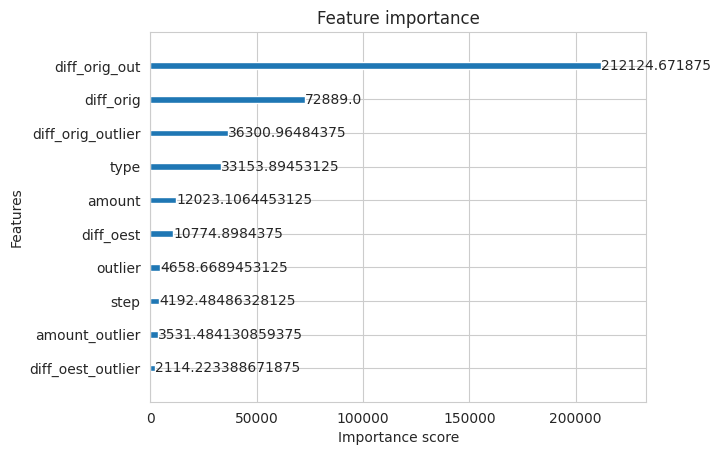

In [105]:
# to visualize which feature is important
xgb.plot_importance(best_model, max_num_features=10, importance_type='gain')
plt.show()